# 1. Definiciones básicas de probabilidad

**Definición.** Sea $\Omega$ un conjunto (espacio muestral). Una función $\mathbb{P}$ que manda subconjuntos $A \subseteq \Omega$ (sucesos) en números reales positivos $\mathbb{P}(A) \geq 0$ se dice una *probabilidad* si:
* (Normalización) Se tiene $\mathbb{P}(\Omega)=1$ y $\mathbb{P}(\emptyset)=0$.
* (Aditividad) Si $A, B \subseteq \Omega$ son disjuntos, entonces $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$.

El par $(\Omega, \mathbb{P})$ se llama un *espacio de probabilidad*.

**Observación.**
* $\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$. *Demostración:* $\mathbb{P}(A) + \mathbb{P}(A^c)= \mathbb{P}(A \cup A^c) = \mathbb{P}(\Omega)=1$.
* Si $A \subseteq B$ entonces $\mathbb{P}(A) \leq \mathbb{P}(B)$. *Demostración:* $\mathbb{P}(B) = \mathbb{P}(A) + \mathbb{P}(B-A) \geq \mathbb{P}(A)$.

**Ejemplo.**
* Tomamos $\Omega = \left\{a,b,c\right\}$ y hacemos
$$
    \mathbb{P}(\emptyset)=0 \hspace{0.5cm} \mathbb{P}(\left\{a\right\}) = 0.2 \hspace{0.5cm} \mathbb{P}(\left\{b\right\}) = 0.3 \hspace{0.5cm}     \mathbb{P}(\left\{c\right\}) = 0.5
$$
$$
    \mathbb{P}(\left\{a,b\right\}) = 0.5 \hspace{0.5cm} \mathbb{P}(\left\{a,c\right\}) = 0.7 \hspace{0.5cm}     \mathbb{P}(\left\{b,c\right\}) = 0.8 \hspace{0.5cm} \mathbb{P}(\left\{a,b, c\right\}) = 1
$$
* Tomamos $\Omega = \left\{\textrm{cara}, \textrm{cruz}\right\}$ y hacemos
$$
    \mathbb{P}(\textrm{cara}) = 0.2 \hspace{0.5cm}     \mathbb{P}(\textrm{cruz}) = 0.8
$$

* En general, si $\Omega$ es un conjunto finito, una probabilidad viene determinada por los valores $\mathbb{P}(x)$ para $x \in \Omega$ tales que $\sum_{x \in \Omega} \mathbb{P}(x) = 1$ (probabilidad discreta).

* Regla de Laplace: Si todos los sucesos unipuntuales son igual de probables $\mathbb{P}(A) = \frac{\textrm{éxitos}}{\textrm{totales}}$.

**Ejercicio.**
* ¿Cuál es la probabilidad de sacar un rey en una baraja de cartas española?.

In [1]:
# APLICA LA REGLA DE LAPLACE AL
# EXPERIMENTO SUMINISTRADO

def experimentar(experimento, intentos = 100000):
    exitos = 0
    
    for i in range(intentos):
        if experimento():
            exitos = exitos + 1
    return exitos/intentos

In [2]:
import random

def sacar_carta():
    carta = random.randint(1, 40)
    if carta > 36:
        return True
    return False

print("Resultado teorico: %s"%(4/40))
print("Resultado experimental: %s"%experimentar(sacar_carta))

Resultado teorico: 0.1
Resultado experimental: 0.09992


* Si sacamos dos cartas de una baraja española sin reemplazo, ¿cuál es la probabilidad de sacar dos reyes?. Difícil!

In [3]:
def experimento():
    carta1 = random.randint(1, 40)
    carta2 = random.randint(1, 40)
    while carta2 == carta1:
        carta2 = random.randint(1, 40)
    
    if carta1 > 36 and carta2 > 36:
        return True
    return False

print(experimentar(experimento))

0.00781


## 1.1. Dependencia e independencia

**Definición.** Dos sucesos $A, B \subseteq \Omega$ se dicen *independientes* si
$$
 \mathbb{P}(A \cap B) = \mathbb{P}(A) \cdot \mathbb{P}(B).
$$

**Ejemplo.** $\Omega = \left\{\textrm{cara o cruz en dos monedas}\right\}$. $A =$ Sacar cara en la primera moneda y $B=$ Sacar cara en la segunda moneda. Entonces $\mathbb{P}(A)=\mathbb{P}(B)=0.5$ y $\mathbb{P}(A \cap B)=\mathbb{P}(\textrm{Dos caras}) = 0.25 = 0.5\cdot 0.5$.

**Definición.** Dados dos sucesos $A, B \subseteq \Omega$, la *probabilidad condicionada* de $A$ dado $B$ es
$$
    \mathbb{P}(A\,|\,B)=\frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}.
$$

**Observación.** Si $A$ y $B$ son independientes, entonces $\mathbb{P}(A\,|\,B)=\mathbb{P}(A)$.

**Ejercicio.** Probabilidad de sacar dos reyes sin reemplazo.
$$
    \mathbb{P}(R_1 \cap R_2) =  \mathbb{P}(R_2\,|\, R_1) \mathbb{P}(R_1) = \frac{3}{39}\frac{4}{40} \approx 0.0077
$$

**Proposición (regla de la probabilidad total)** Supongamos que descomponemos $\Omega = B_1 \cup B_2 \cup \ldots B_n$ con los $B_n$ disjuntos. Entonces, para todo suceso $A$
$$
    \mathbb{P}(A) = \sum_{i=1}^n \mathbb{P}(A\,|\,B_i)\mathbb{P}(B_i)
$$

**Ejercicio.** Probabilidad que la segunda carta sea un rey.
$$
    \mathbb{P}(R_2) =  \mathbb{P}(R_2\,|\, R_1) \mathbb{P}(R_1) +\mathbb{P}(R_2\,|\, R_1^c) \mathbb{P}(R_1^c) = \frac{3}{39}\frac{4}{40} + \frac{4}{39}\frac{36}{40} = 0.1
$$

In [4]:
def experimento():
    carta1 = random.randint(1, 40)
    carta2 = random.randint(1, 39)
    if carta1 > 40-4 and carta2 > 39-3:
        return True
    if carta1 <= 40-4 and carta2 > 39-4:
        return True
    
    return False

print(experimentar(experimento))

0.1004


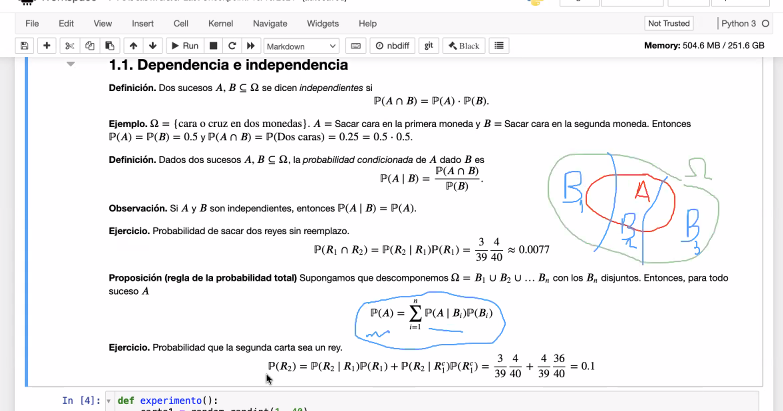

## 1.2. Regla de Bayes

**Proposición (regla de Bayes).** Para todo suceso $A$ y $B$, se tiene
$$
    \mathbb{P}(B\,|\,A)=\frac{\mathbb{P}(A\,|\,B)\,\mathbb{P}(B)}{\mathbb{P}(A)}.
$$
*Demostración.* Usando la definición, se tiene
$$
    \mathbb{P}(B\,|\,A)\,\mathbb{P}(A)=\mathbb{P}(A \cap B) = \mathbb{P}(A\,|\,B)\,\mathbb{P}(B).
$$

**Ejercicio.** Una enfermedad tiene una prevalencia del 15%. Se ha diseñado un test que tiene un 0.1% de falsos negativos y un 1% de falsos positivos. Si sabemos que, en un paciente, el test ha resultado positivo, ¿qué probabilidad hay de que el paciente sufra la enfermedad?

*Solución.*
Denotemos $E = $ Sufrir la enfermedad y $T = $ El test ha dado positivo. Los falsos negativos son $\mathbb{P}(T^c\,|\,E) = 0.001$ y los falsos positivos son $\mathbb{P}(T\,|\,E^c) = 0.01$. Con estos datos, calculamos $\mathbb{P}(T\,|\,E) = 1-0.001=0.999$.

Queremos calcular $\mathbb{P}(E\,|\,T)$. Para ello, usamos la regla de Bayes para obtener

$$
    \mathbb{P}(E\,|\,T) = \frac{\mathbb{P}(T\,|\,E) \mathbb{P}(E)}{\mathbb{P}(T)} = \frac{\mathbb{P}(T\,|\,E) \mathbb{P}(E)}{\mathbb{P}(T\,|\,E)\mathbb{P}(E) + \mathbb{P}(T\,|\,E^c)\mathbb{P}(E^c)} = \frac{0.999\cdot 0.15}{0.999\cdot 0.15 + 0.01 \cdot 0.85} \approx 0.946.
$$

## 1.3. Clasificador Naïve Bayes

Usando la regla de Bayes, es posible dar un clasificador muy sencillo que permite obtener unos resultados razonables de forma rápida.

Supongamos que tenemos un conjunto de datos $x_1, \ldots, x_N$, cada uno de los cuales consta de $d$ atributos $x_i=(x_i^1, \ldots, x_i^d) \in \mathbb{R}^d$. Además, tenemos un número finito de clases y cada uno de los datos pertenece a alguna de esas clases, digamos clases $c_1, \ldots, c_N$.

Entonces, si nos llega un nuevo dato $x = (x^1, \ldots, x^d)$ y queremos estimar su clase, podemos calcular, para cada posible clase $c$, la probabilidad

$$
    \mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right) = \frac{\mathbb{P}\left(x^1, \ldots, x^d \,|\, c\right) \mathbb{P}\left(c\right)}{\mathbb{P}\left(x^1, \ldots, x^d\right)}.
$$

La asunción de naïve Bayes es que los sucesos $x^1, \ldots, x^d$ son independientes dada una clase $c$ y, por tanto

$$
    \mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right) = \frac{ \prod_{k=1}^d\mathbb{P}\left(x^k\,|\, c\right) \mathbb{P}\left(c\right)}{\mathbb{P}\left(x^1, \ldots, x^d\right)}.
$$

Cada una de las probabilidades a priori pueden ser estimadas del conjunto de datos usando la regla de Laplace. De este modo, escogeremos la clase $c$, de entre todas las posibles, que maximice $\mathbb{P}\left(c \,|\, x^1, \ldots, x^d\right)$. 

**Observación.** El factor $\mathbb{P}\left(x^1, \ldots, x^d\right)$ es común para todas las clases, por lo que podemos ignorarlo a la hora de optimizar la probabilidad.

In [8]:
# CLASIFICADOR DE NAIVE BAYES
'''
xk = es la columna que estoy mirando, la entrada del dataset
k = el numero de entrada
c = la clase que estoy mirando
X = el dataset entero
T = La columna roja digamos, el target, las labels de los datos
'''
def compute_probabilidad_atributo(xk, k, c, X, T, margen = 0.3):
    exito = 0.0
    totales = 0.0

    for i in range(len(X)): #Recorro todo el dataset
        if T[i] == c:
            totales = totales + 1
            #if X[i][k] == xk:
            if abs(X[i][k] - xk) < margen:
                exito = exito + 1

    return exito/totales

def compute_probabilidad_clase(c, T):
    exito = 0.0

    for t in T:
        if t == c:
            exito = exito + 1

    return exito/len(T)

def naive_bayes(x, X, T, clases, margen = 0.3):
    probabilidades = []

    for c in clases:
        producto = compute_probabilidad_clase(c, T)
        for k in range(len(x)):
            producto = producto * compute_probabilidad_atributo(x[k], k, c, X, T, margen)

        probabilidades.append(producto)

    return probabilidades

In [6]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.load_digits()

X = mnist['data']
T = mnist['target']
clases = mnist['target_names']

probabilidades = naive_bayes(X[12], X, T, clases, margen = 3)
print(probabilidades)
print([p / sum(probabilidades) for p in probabilidades])
print(T[12])

[0.0, 1.109102415728165e-26, 8.4859512670464e-20, 5.998506563715454e-32, 0.0, 0.0, 0.0, 0.0, 4.6575723461351995e-28, 2.2166818531475747e-33]
[0.0, 1.3069863705071997e-07, 0.9999998638120625, 7.068748756648284e-13, 0.0, 0.0, 0.0, 0.0, 5.488567592789313e-09, 2.6121780357970142e-14]
2


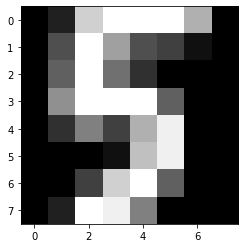

In [7]:
def pintar_numero(d):
    pixels = d.reshape((8, 8))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
pintar_numero(X[32])

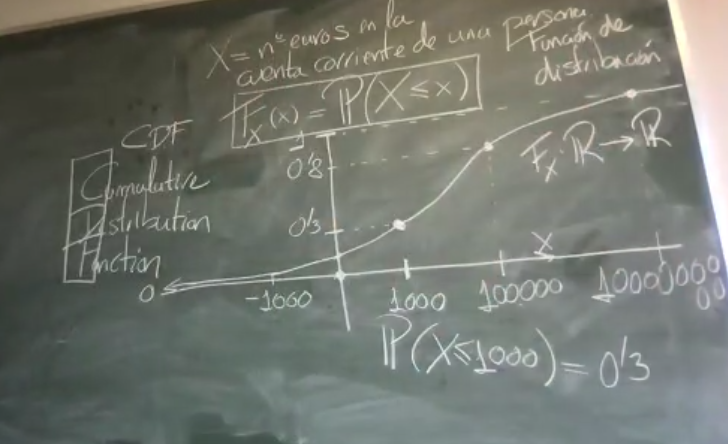

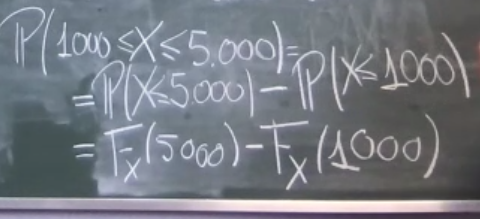

# 2. Variables aleatorias

**Definición.** Sea $(\Omega, \mathbb{P})$ un espacio de probabilidad. Una *variable aleatoria* es una función $X: \Omega \to \mathbb{R}$.

El concepto de variable aleatoria captura la idea de 'experimento'. De este modo, si $\omega \in \Omega$ es un suceso, podemos pensar que $X(\omega) \in \mathbb{R}$ es el valor que tiene un cierto experimento cuando sucede $\omega$.

**Definición.** Sea $X$ una varible aleatoria. Su función de distribución $F_X: \mathbb{R} \to [0, 1]$, se define por

$$
    F_X(x) = \mathbb{P}(X \leq x),
$$

donde, para ser precisos, $\mathbb{P}(X \leq x)$ denota $\mathbb{P}(X^{-1}(-\infty, x])$. Dos variables aleatorias $X$ e $Y$ se dice que son *idénticamente distribuidas* si $F_X(x) = F_Y(x)$ para (casi) todo $x \in \mathbb{R}$.

**Observación.** La propiedad clave de las variables aleatorias es que permiten 'hacer transparente' el espacio muestral $\Omega$, codificando toda la información de la probabilidad $\mathbb{P}$ en la función de distribución. En efecto si $I = (a,b]$ es un intervalo de $\mathbb{R}$, entonces tenemos que

$$
    \mathbb{P}(a < X \leq b) = \mathbb{P}(\left\{X \leq b\right\} - \left\{X \leq a\right\}) = \mathbb{P}(X \leq b) - \mathbb{P}(X \leq a) = F_X(b) - F_X(a).
$$

Mismos argumentos pueden hacerse para otros intervalos y conjuntos que sean unión de intervalos.


**Ejemplo.** Fijemos $0 \leq p \leq 1$. Sea $\Omega = \left\{a,b\right\}$ y $\mathbb{P}$ dada por $\mathbb{P}(a)=p$ y $\mathbb{P}(b)=1-p$. La variable aleatoria $X: \Omega \to \mathbb{R}$, dada por $X(a)=1$ y $X(b)=0$ se llama *varible de Bernoulli*. Obsérvese que queda completamente identificada por la propiedad de que

$$
    \mathbb{P}(X = 1) = p \hspace{1cm} \mathbb{P}(X=0)=1-p.
$$

y su función de densidad es

$$
    F_X(x) = \left\{\begin{matrix}0 & \textrm{si }x < 0 \\
    1-p &\textrm{si } 0\leq x < 1\\
    1 &\textrm{si } x \geq 1\\\end{matrix}\right.
$$

Dentro del conjunto de variables aleatorias, hay dos tipos especiales que son ampliamente estudiadas por su facilidad de manejo, las llamadas distribuciones continuas y discretas.

## 2.1. Media y varianza

Dada una variable aleatoria $X$, puede 'resumirse' toda su información en un número, conocido como *esperanza* o *media* de $X$, y denotado $\mathbb{E}(X)$. Este número puede interpretarse como el valor que 'se espera' que tome $X$ normalmente. Para una distribución general, se define como

$$
    \mathbb{E}(X) = \int_{\Omega} X\,d\mathbb{P}
$$

Esta expresión es incalculable en la práctica, pero si la variable es discreta o continua, se puede calcular con una expresión mucho más sencilla. No obstante, a partir de esta expresión ya se pueden obtener una propiedad muy importante.

**Proposición.** La función esperanza $\mathbb{E}: \left\{\textrm{variables aleatorias}\right\} \to \mathbb{R}$ es una aplicación lineal. Esto quiere decir que, para cualesquiera variables aleatorias $X, Y$ y $\lambda \in \mathbb{R}$, se tiene

$$
    \mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y), \hspace{1cm} \mathbb{E}(\lambda X) = \lambda \mathbb{E}(X).
$$

Por otra parte, se define la *varianza* de $X$, denotada $\mathbb{V}(X)$ por
$$
    \mathbb{V}(X) = \mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right)
$$


**Observación.** La media es el primer ejemplo de las llamadas 'medidas de centralidad o concentración', que buscan resumir la información de 'cómo suele centrarse $X$'. Por contra, la varianza es el primer ejemplo de una 'medida de dispersión', que busca entender 'cómo suele desviarse $X$ de su media'.

**Observación.** Es muy común denotar $\mu = \mathbb{E}(X)$ y $\sigma^2 = \mathbb{V}(X)$. También, a la cantidad $\sigma = \sqrt{\mathbb{V}(X)}$ se le llama la *desviación típica* de $X$.

**Proposición.** Se tiene que
$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2, \hspace{1cm} \mathbb{V}(\lambda X) = \lambda^2 \mathbb{V}(X). 
$$

*Demostración.* Para la primera parte, basta con expandir el cuadrado y usar linealidad para obtener

$$
\mathbb{V}(X) = \mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right) = \mathbb{E}\left(X^2+\mathbb{E}(X)^2-2X\mathbb{E}(X)\right) = \mathbb{E}\left(X^2\right)+\mathbb{E}\left(\mathbb{E}(X)^2\right)-\mathbb{E}\left(2X\mathbb{E}(X)\right) = \mathbb{E}\left(X^2\right)+\mathbb{E}(X)^2-2\mathbb{E}(X)\mathbb{E}\left(X\right) = \mathbb{E}\left(X^2\right)-\mathbb{E}(X)^2.
$$

Para la segunda parte, la propiedad de extraer linealmente escalares demuestra que

$$
\mathbb{V}(\lambda X)= \mathbb{E}\left(\left(\lambda X-\mathbb{E}(\lambda X)\right)^2\right) = \mathbb{E}\left(\left(\lambda X-\lambda\mathbb{E}(X)\right)^2\right) = \mathbb{E}\left(\lambda^2\left(X-\mathbb{E}(X)\right)^2\right) = \lambda^2\mathbb{E}\left(\left(X-\mathbb{E}(X)\right)^2\right) = \lambda^2 \mathbb{V}(\lambda X).
$$

**Proposición.** Sean $X_1, \ldots, X_n$ variables aleatorias independientes. Entonces,

$$
    \mathbb{V}\left(\sum_{i=1}^n X_i\right) = \sum_{i=1}^n \mathbb{V}(X_i).
$$

*Demostración.* Como las $X_i$ son independientes, se tiene que $\mathbb{E}(X_iX_j)=\mathbb{E}(X_i)\mathbb{E}(X_j)$ para todo $i \neq j$. De este modo,

$$
    \mathbb{V}\left(\sum_{i=1}^n X_i\right) = \mathbb{E}\left(\left(\sum_i X_i-\mathbb{E}\left(\sum X_i\right)\right)^2\right)= \mathbb{E}\left(\left(\sum_i X_i-\mathbb{E}\left(X_i\right)\right)^2\right) = \sum_{i,j}\mathbb{E}\left(X_iX_j\right)-\sum_{i,j}2\mathbb{E}\left(X_i\mathbb{E}(X_j)\right) + \sum_{i,j}\mathbb{E}(X_i)\mathbb{E}(X_j) = \sum_{i,j}\mathbb{E}\left(X_iX_j\right)-\mathbb{E}(X_i)\mathbb{E}(X_j) = \sum_{i}\mathbb{E}\left(X_i^2\right)-\mathbb{E}(X_i)^2 = \sum_{i=1}^n \mathbb{V}(X_i).
$$

Obsérvese que, hasta la penúltima igualdad, todo el argumento es algebraico y no se usa en ningún momento que las variables son independientes. La clave de la prueba es, pues, que $\mathbb{E}\left(X_iX_j\right)-\mathbb{E}(X_i)\mathbb{E}(X_j) = 0$ para $i \neq j$.

En general, si $X$ e $Y$ son dos variables aleatorias, no necesariamente independientes, definimos su *covarianza* como

$$
Cov(X, Y) = \mathbb{E}\left((X-\mathbb{E}(X))(Y-\mathbb{E}(Y))\right) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y).
$$

Obsérvese que, si $X$ e $Y$ son independientes, entonces $Cov(X,Y)=0$, que es exactamente lo que usamos en la prueba anterior. De igual forma, $Cov(X,X) = \mathbb{V}(X)$.

## 2.2. Distribuciones discretas

Una variable aleatoria discreta, $X$, es una función que toma una cantidad numerable de valores (i.e. $X(\Omega) \subseteq \mathbb{R}$ es un conjunto numerable), digamos $x_1, x_2, \ldots \in \mathbb{R}$, llamado *soporte*. En ese caso, $X$ queda unívocamente determinada por la llamada *función de masa*

$$
    p_X(x_i) = \mathbb{P}(X = x_i).
$$

que cumple que $\sum_{x_i}p_X(x_i) = \mathbb{P}(\Omega)=1$. De este modo, la función de distribución viene dada por
$$
    F_X(x) = \sum_{x_i \leq x} p_X(x_i).
$$

**Observación.** En gran parte de las distribuciones discretas, el soporte son los números naturales $0, 1, 2, \ldots \in \mathbb{R}$ o, incluso, un subconjunto de ellos.

**Media y varianza.** Para este tipo de variables aleatorias, su esperanza viene dada por

$$
    \mathbb{E}(X) = \sum_{x_i} x_i p_X(x_i).
$$

En consecuencia, su varianza se calcula como

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \sum_{x_i} x_i^2 p_X(x_i) - \left(\sum_{x_i} x_i p_X(x_i)\right)^2.
$$

### Prueba de Bernouilli

**Parámetros.** $0 \leq p \leq 1$. Se denota $X \sim B(p)$.

**Soporte.** $0$ y $1$.

**Significado.** Se realiza una prueba que tiene dos posibles resultados: $1$ con probabilidad $p$ (éxito) y $0$ con probabilidad $1-p$ (fracaso). Por ejemplo, es una moneda pesada que sale cara con probabilidad $p$.

**Función de masa.**

$$
    p(1) = p, \hspace{1cm} p(0) = 1-p.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=p, \hspace{1cm} \mathbb{V}(X) = p(1-p).
$$

*Demostración.* Para la media, se tiene

$$
    \mathbb{E}(X) = 1\cdot p + 0 \cdot (1-p) = p.
$$

Además, como $X^2 = X$, se tiene $\mathbb{E}(X^2)=p$ y, por tanto

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = p - p^2 = p(1-p).
$$

**Observación.** Se suele denotar $q = 1-p$.

### Distribución binomial

**Parámetros.** $0 \leq p \leq 1$ y $n \geq 1$. Se denota $X \sim Bin(p,n)$.

**Soporte.** $0,1,2,\ldots, n$.

**Significado.** Se realizan $n$ pruebas de Benouilli que tiene probabilidad $p$ de éxito y se cuenta el número de éxitos. Por ejemplo, se tiran $n$ monedas pesadas y se cuentan caras.

Una interpretación analítica es que, si $X_1, \ldots, X_n$ son variables aleatorias independientes con $X_i \sim B(p)$, entonces $X = \sum_{i=1}^n X_i \sim Bin(p,n)$.

**Función de masa.**

$$
    p(k) = \left(\begin{matrix}n \\ k\end{matrix}\right)p^k(1-p)^{n-k},
$$
dónde el coeficiente binomial está dado por
$$
    \left(\begin{matrix}n \\ k\end{matrix}\right) = \frac{n!}{k!(n-k)!}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=np, \hspace{1cm} \mathbb{V}(X) = np(1-p).
$$

*Demostración.* Si escribimos $X = \sum X_i$ con $X_i \sim B(p)$ independientes, entonces

$$
    \mathbb{E}(X) = \sum_{i=1}^n \mathbb{E}(X_i) = \sum_{i=1}^n p = np.
$$

$$
    \mathbb{V}(X) = \sum_{i=1}^n \mathbb{V}(X_i) = \sum_{i=1}^n p(1-p) = np(1-p).
$$

### Distribución geométrica

**Parámetros.** $0 \leq p \leq 1$. Se denota $X \sim Geo(p)$.

**Soporte.** $1,2,\ldots$.

**Significado.** Intentos de pruebas de Benouilli hasta que se obtiene el primer éxito. De este modo, $\mathbb{P}(X = k)$ es la probabilidad de que el primer éxito se obtenga en el $k$-ésimo intento (i.e. se han tenido $k-1$ fracasos y el $k$-ésimo intento es un éxito).

**Función de masa.**

$$
    p(k) = (1-p)^{k-1}p.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{1}{p}, \hspace{1cm} \mathbb{V}(X) = \frac{1-p}{p^2}.
$$

### Distribución binomial negativa

**Parámetros.** $0 \leq p \leq 1$ y $r \geq 1$. Se denota $X \sim BN(p, r)$.

**Soporte.** $0,1,\ldots$.

**Significado.** Número de éxitos de pruebas de Benouilli hasta que se obtienen exactamente $r$ fracasos. De este modo, $\mathbb{P}(X = k)$ es la probabilidad de que haya que haya que hacer $r+k$ intentos para conseguir $k$-éxitos y, en el $(r+k)$-ésimo intento, el $r$-ésimo fracaso.

**Función de masa.**

$$
    p(k) = \left(\begin{matrix} k+r-1 \\ k\end{matrix}\right)p^{k}(1-p)^{r}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{pr}{1-p}, \hspace{1cm} \mathbb{V}(X) = \frac{pr}{(1-p)^2}.
$$

### Distribución de Poisson

**Parámetros.** $\lambda > 0$. Se denota $X \sim Pois(\lambda)$.

**Soporte.** $0,1,\ldots$.

**Significado.** Distribución de eventos raros. Se suponen eventos raros cuya probabilidad de ocurrir repetidas veces decae exponencialmente. Por ejemplo, errores tipográficos en una página de un libro o número de conexiones simultáneas a un servidor.

**Función de masa.**

$$
    p(k) = \frac{e^{-\lambda}\lambda^k}{k!}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\lambda, \hspace{1cm} \mathbb{V}(X) = \lambda.
$$

**Observación.** La distribución de Poisson tiene una propiedad conocida como 'falta de memoria' (memoryless en inglés). Es la única distribución discreta que satisface
$$
    \mathbb{P}(X > n + m\,|\, X > m) = \mathbb{P}(X > n).
$$

### Distribución uniforme discreta

**Parámetros.** $k>0$. Se denota $X \sim U(k)$.

**Soporte.** $1,\ldots, k$.

**Significado.** Se muestrea en $k$ eventos equiprobables.

**Función de masa.**

$$
    p(i) = \frac{1}{k}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{k}{2}, \hspace{1cm} \mathbb{V}(X) = \frac{k^2-1}{12}.
$$

### Distribución categórica

**Parámetros.** $k>0$ y números $0 \leq p_1, \ldots, p_i \leq 1$ tales que $\sum p_k = 1$. Se denota $X \sim Cat(p_1, \ldots, p_k)$.

**Soporte.** $0,1,\ldots, k$.

**Significado.** Se tienen $k$ clases distintas y la probabilidad de pertener a la clase $i$-ésima es $p_i$. Entonces $X$ es el experimento de escoger un elemento aleatorio y mirar su clase.

**Función de masa.**

$$
    p(i) = p_i.
$$

**Observación.** Es la distribución discreta con soporte finito de valores más general. En particular, se tiene
$$
    B(p)=Cat(1-p, p), \hspace{0.4cm} Bin(p,n)=Cat\left((1-p)^n, \ldots, \left(\begin{matrix}n \\ k\end{matrix}\right)p^k(1-p)^{n-k}, \ldots, p^n\right), \hspace{0.4cm} U(k) = Cat\left(\frac{1}{k}, \ldots, \frac{1}{k}\right).
$$

### Distribución multinomial

**Parámetros.** $k, n > 0$ y números $0 \leq p_1, \ldots, p_k \leq 1$ tales que $\sum p_i = 1$. Es un vector aleatorio $k$-dimensional $X = (X^1, \ldots, X^k)$. Se denota $X \sim Mult(n, k, p_1, \ldots, p_k)$.

**Soporte.** $\left\{(x^1, \ldots, x^k) \in \left\{0,1,\ldots, n\right\}\,|\, \sum_i x^i = n \right\}$.

**Significado.** Se tiene un dado de $k$ caras, de forma que la probabilidad de obtener la cara $i$-ésima es $p_i$. En cada experimento, tiro el dado $n$ veces y observo qué caras obtengo. De este modo, el resultado del experimento es $X = (x^1, \ldots, x^k)$ donde cada $x^i$ es un entero que identifica cuántas veces obtuve la cara $i$-ésima (por ese motivo, $\sum_i x^i =n$ es el número total de tiradas).

**Función de masa.**

$$
    p(x^1, \ldots, x^k) = \frac{n!}{x^1!\cdots x^k!} p_1^{x^1}\cdots p_k^{x^k}.
$$

**Observación 1.** Generaliza a la distribución categórica en el sentido de que $Cat(p_1, \ldots, p_k) = Mult(1, k, p_1, \ldots, p_k)$. En este caso, para cada experimento $X = (x^1, \ldots, x^k)$ únicamente una de las $x^i = 1$ y el resto son $x^j = 0$ para $i \neq j$. Ese resultado se interpreta como que se ha obtenido la clase $i$-ésima.

**Observación 2.** Por comodidad para la parte de Estadística, los índices de las $x^i$ se han denotado como superíndices en lugar de como subíndices, como suele ser habitual.

#### Ejercicios
* Comprobar de forma empírica de la función de masa de la distribución binomial.
* Comprobar de forma empírica de la función de masa de la distribución geométrica.
* Comprobar de forma empírica de la función de masa de la distribución binomial negativa.

## 2.3. Distribuciones continuas

Una variable aleatoria $X$ se dice continua si su función de distribución puede escribirse de la forma especial

$$
    F_X(x) = \mathbb{P}(X \leq x) = \int_{-\infty}^x f_X(s)\,ds
$$

La función $f_X: \mathbb{R} \to \mathbb{R}$ se llama *función de densidad* y cumple que $\int_{-\infty}^{\infty} f_x = 1$. El conjunto de puntos para los que $f_X(s) \neq 0$ se llama el *soporte* de la variable aleatoria.

**Media y varianza.** Para este tipo de variables aleatorias, su esperanza viene dada por

$$
    \mathbb{E}(X) = \int_{-\infty}^{\infty} s f_X(s)\,ds.
$$

En consecuencia, su varianza se calcula como

$$
    \mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = \int_{-\infty}^{\infty} s^2 f_X(s)\,ds - \left( \int_{-\infty}^{\infty} s f_X(s)\,ds\right)^2.
$$

### Distribución uniforme

**Parámetros.** $a < b$. Se denota $X \sim U(a,b)$.

**Soporte.** $[a,b]$.

**Significado.** Se muestrea un fenómeno que ocurre de forma uniforme en el intervalo $[a,b]$.

**Función de densidad.**

$$
    f(s) = \left\{\begin{matrix} 0 & \textrm{si } s < a \\ \frac{1}{b-a} & \textrm{si } a \leq s \leq b \\0 & \textrm{si } s > b\end{matrix}\right. .
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{a+b}{2}, \hspace{1cm} \mathbb{V}(X) = \frac{(b-a)^2}{12}.
$$

### Distribución exponencial

**Parámetros.** $\lambda > 0$. Se denota $X \sim Exp(\lambda)$.

**Soporte.** $[0,\infty)$.

**Significado.** Versión continua de la distribución de Poisson.

**Función de densidad.**

$$
    f(s) = \lambda e^{-\lambda s}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\frac{1}{\lambda}, \hspace{1cm} \mathbb{V}(X) = \frac{1}{\lambda^2}.
$$

### Distribución normal

**Parámetros.** $\mu \in \mathbb{R}$ y $\sigma > 0$. Se denota $X \sim N(\mu,\sigma)$.

**Soporte.** $\mathbb{R}$.

**Significado.** Se muestrea un fenómeno de media $\mu$ y desviación típica $\sigma$ que es combinación de multitud de factores independientes.

**Función de densidad.**

$$
    f(s) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(s-\mu)^2}{2\sigma^2}}.
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\mu, \hspace{1cm} \mathbb{V}(X) = \sigma^2.
$$

**Observación.**
* Probablemente, la distribución más importante de todas debido a su predominante papel en el Teorema Central del Límite.
* La distribución $N(0,1)$ se llama *normal estándar*.


### Distribución normal multivariante

**Parámetros.** $n>0$ entero (dimensión). $\bar{\mu} = (\mu_1, \ldots, \mu_n)$ vector de medias y $\Sigma$ una matriz $n \times n$ invertible de entradas no negativas. Se denota $X \sim N\left(\mathbf{\mu}, \Sigma\right)$.

**Soporte.** $\mathbb{R}^n$.

**Significado.** Versión $n$-dimensional de la normal. Determina la distribución del vector $X=(X_1, \ldots, X_n)$ de $n$ variables aleatorias distribuidas normalmente con medias $\mu_1, \ldots, \mu_n$ y matriz de covarianzas $\Sigma$.

**Función de densidad.**

$$
    f(s_1, \ldots, s_n) = \frac
 {1}
 {(2\pi)^{n/2}\sqrt{\det\left(\Sigma\right)}}
\exp
\left(
 -\frac{1}{2}
 (\bar{s} - \bar{\mu})^t \Sigma^{-1} (\bar{s} - \bar{\mu})
\right)
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\bar{\mu}, \hspace{1cm} Cov(X) = \Sigma.
$$

### Distribución $\chi^2$

**Parámetros.** $\nu > 0$, llamado grados de libertad. Se denota $X \sim \chi^2(\nu)$.

**Soporte.** $[0,\infty)$.

**Significado.** Sean $Z_1, \ldots, Z_\nu \sim N(0,1)$ independientes. Si $X = Z_1^2 + \ldots + Z_\nu^2$ entonces $X \sim \chi^2(\nu)$.

**Función de densidad.**

$$
    f(s) = \begin{cases}
0&\text{si }s\le0\\
\frac{1}{2^{\nu/2}\Gamma\left(\frac{\nu}{2}\right)}\,s^{\frac{\nu}{2} - 1} e^{-\frac{s}{2}}&\text{si }s>0
\end{cases}
$$

donde $\Gamma$ denota la función
$$
    \Gamma(t) = \int_0^\infty x^{t-1}e^{-x} \,dx
$$

**Media y varianza.**

$$
    \mathbb{E}(X)=\nu, \hspace{1cm} \mathbb{V}(X) = 2\nu.
$$

**Observación.**
* La función $\Gamma$ satisface $\Gamma(n)=(n-1)!$ si $n$ es un número natural.
* Esta distribución es muy útil para realizar test estadísticos. 

### Distribución $t$ de Student

**Parámetros.** $\nu > 0$, llamado grados de libertad. Se denota $X \sim t(\nu)$.

**Soporte.** $\mathbb{R}$.

**Significado.** Sean $Z \sim N(0,1)$ y $V \sim \chi^2(\nu)$ independientes. Si $X = \frac{Z}{\sqrt{V/\nu}}$ entonces $X \sim t(\nu)$.

**Función de densidad.**

$$
    f(s) = \frac{\Gamma((\nu+1)/2)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu\pi}} \left(1+\frac{s^2}{\nu}\right)^{-(\nu+1)/2}
$$

**Media y varianza.**

$$
    \mathbb{E}(X)= \left\{\begin{matrix} \infty & \textrm{si } \nu \leq 1 \\ 0 & \textrm{si } \nu >1 \end{matrix}\right., \hspace{1cm} \mathbb{V}(X) = \left\{\begin{matrix} \infty & \textrm{si } \nu \leq 2 \\ \frac{\nu}{\nu -2} & \textrm{si } \nu >2 \end{matrix}\right..
$$

### Distribución de Dirichlet

**Parámetros.** $k>0$ entero (dimensión) y $\bar{\alpha} = (\alpha_1, \ldots, \alpha_k)$. Se denota $X \sim Dir\left(\bar{\alpha}\right)$.

**Soporte.** El $k$-símplice $\Delta^k = \left\{(s_1, \ldots, s_k)\,|\, s_i \geq 0, \sum_i s_i = 1\right\}$.

**Significado.** Versión $n$-dimensional de la normal. Determina la distribución del vector $X=(X_1, \ldots, X_n)$ de $n$ variables aleatorias distribuidas normalmente con medias $\mu_1, \ldots, \mu_n$ y matriz de covarianzas $\Sigma$.

**Función de densidad.**

$$
    f(s_1, \ldots, s_n) = \left\{\begin{matrix}\frac{1}{\mathbf{B}(\bar{\alpha})} \prod_{i=1}^k s_i^{\alpha_i - 1} & \textrm{si } \bar{s} \in \Delta^k\\ 0 & \textrm{si } \bar{s} \not\in \Delta^k\end{matrix}\right.
$$

La constante de normalización está dada por la función Beta, denotada $\mathbf{B}$ y dada por

$$
\mathbf{B}(\bar{\alpha}) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
$$

**Observación.** Como su soporte es el $\Delta^k$-simplice, puede pensarse que un punto $\bar{s}$ en su soporte representa el vector de parámetros de una distribución categórica $Cat(s_1, \ldots, s_k)$. En este sentido, la distribución de Dirichlet modeliza la probabilidad de tener distintas distribuciones categóricas modelizando un fenómeno.

### Distribución $F$ de Snedecor

**Parámetros.** $\nu_1, \nu_2 > 0$, llamado grados de libertad. Se denota $X \sim F(\nu_1, \nu_2)$.

**Soporte.** $[0, \infty)$ ($(0, \infty)$ si $\nu_1=1$).

**Significado.** Sean $V_1 \sim \chi^2(\nu_1)$ y $V_2 \sim \chi^2(\nu_2)$ independientes. Si $X = \frac{V_1/\nu_1}{V_2/\nu_2}$ entonces $X \sim F(\nu_1, \nu_2)$.

**Función de densidad.**

\begin{align*}
    f(s) = \frac{1}{\mathbf{B}\!\left(\frac{\nu_1}{2},\frac{\nu_2}{2}\right)} \left(\frac{\nu_1}{\nu_2}\right)^{\frac{\nu_1}{2}} s^{\frac{\nu_1}{2} - 1} \left(1+\frac{\nu_1}{d_2}\,s\right)^{-\frac{\nu_1+\nu_2}{2}}
\end{align*}


**Media y varianza.**

$$
    \mathbb{E}(X)=  \left\{\begin{matrix} \infty & \textrm{si } \nu_2 \leq 2 \\ {\frac {\nu_{2}}{\nu_{2}-2}} & \textrm{si } \nu_2 >2 \end{matrix}\right., \hspace{1cm} \mathbb{V}(X) = \left\{\begin{matrix} \infty & \textrm{si } \nu_2 \leq 4 \\ \frac{2\nu_2^2(\nu_1 + \nu_2 -2)}{\nu_1(\nu_2-2)^2(\nu_2-4)} & \textrm{si } \nu_2 > 4 \end{matrix}\right..
$$

#### Ejercicios
* Comprobar de forma empírica de la función de distribución de la distribución $\chi^2$.
* Comprobar de forma empírica de la función de distribución de la distribución $t$ de Student.

# 3. Covarianza y correlación

Supongamos que tenemos dos variables aleatorias $X$ e $Y$. Queremos analizar hasta qué punto $X$ e $Y$ son **dependientes**. Para analizar esta dependencia se puede utilizar la llamada **covarianza**

$$
    \textrm{Cov}(X, Y) = \mathbb{E}\left((X-\mathbb{E}(X))(Y-\mathbb{E}(Y))\right).
$$

**Observación:** Esta cantidad es muy similar a la varianza. Suele decirse cómo varían simultáneamente $X$ e $Y$ respecto a su media. De hecho, la varianza se puede recuperar a través de la covarianza porque $\mathbb{V}(X) = \textrm{Cov}(X,X)$.

**Observación 2:** La covarianza, en efecto, detecta la independencia puesto que, si $X$ e $Y$ son independientes, entonces $X-\mathbb{E}(X)$ e $Y-\mathbb{E}(Y)$ también lo son y, por tanto,

$$
    \textrm{Cov}(X, Y) = \mathbb{E}\left((X-\mathbb{E}(X))(Y-\mathbb{E}(Y))\right) = \mathbb{E}\left(X-\mathbb{E}(X)\right)\mathbb{E}\left(Y-\mathbb{E}(Y))\right) = \left(\mathbb{E}(X)-\mathbb{E}(X)\right)\left(\mathbb{E}(Y)-\mathbb{E}(Y))\right) = 0.
$$

Ahora bien, el **recíproco no es cierto**. Puede ocurrir que dos variables aleatorias dependientes tengan covarianza $0$.

La covarianza tiene el problema de que no es adimensional. Es decir, si se reescalan las variables, la covarianza también cambia. Si queremos evitar este fenómeno, puede considerarse el conocido como **coeficiente de correlación de Fisher**

$$
    \rho_{X,Y} = \frac{\textrm{Cov}(X, Y)}{\sqrt{\mathbb{V}(X) \mathbb{V}(Y)}}.
$$

Este coeficiente es invariante por cambio de escala y, de hecho, $-1 \leq \rho_{X,Y} \leq 1$. Los valores extremos tienen el siguiente significado:

* Supongamos que $Y = \alpha X + \beta$, para ciertas constantes $\alpha, \beta \in \mathbb{R}$ con $\alpha > 0$. En ese caso, se tiene que $\rho_{X,Y} = 1$ y se dice que las variables están fuertemente correlacionadas positivamente.

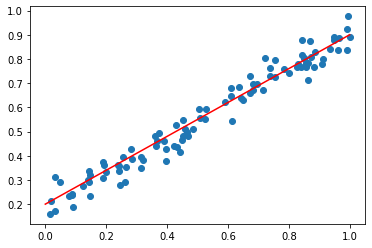

0.981526939150878


In [7]:
from scipy import stats

n = 100
alpha = 0.7
beta = 0.2

x = stats.uniform.rvs(size = n)
y = alpha*x + beta + stats.norm.rvs(scale = 0.05, size = n)

x0 = np.linspace(0, 1, 1000)
y0 = alpha*x0 + beta

plt.plot(x,y, 'o')
plt.plot(x0, y0, 'r')
plt.show()

print(stats.pearsonr(x,y)[0])

* Supongamos que $Y = \alpha X + \beta$, para ciertas constantes $\alpha, \beta \in \mathbb{R}$ con $\alpha < 0$. En ese caso, se tiene que $\rho_{X,Y} = -1$ y se dice que las variables están fuertemente correlacionadas positivamente.

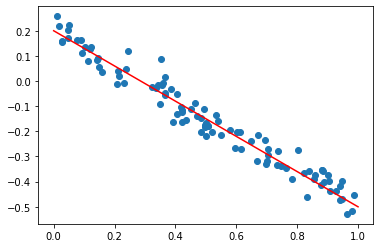

-0.9789537000292768


In [8]:
from scipy import stats

n = 100
alpha = -0.7
beta = 0.2

x = stats.uniform.rvs(size = n)
y = alpha*x + beta + stats.norm.rvs(scale = 0.05, size = n)

x0 = np.linspace(0, 1, 1000)
y0 = alpha*x0 + beta

plt.plot(x,y, 'o')
plt.plot(x0, y0, 'r')
plt.show()

print(stats.pearsonr(x,y)[0])

* Si $X$ e $Y$ son independientes, entonces $\rho_{X,Y} = 0$ (incorrelacionadas).

**Observación 3:** Al igual que en la Observación 2, que $\rho_{X,Y} = \pm 1$ no implica que $X$ e $Y$ estén sujetas a una relación de dependencia lineal (una suerte de causalidad). Esto se suele decir en el contexto de las ciencias experimentales como que **correlación no implica causalidad**.

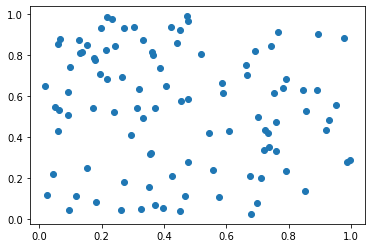

-0.1095777843774155


In [9]:
from scipy import stats

n = 100

x = stats.uniform.rvs(size = n)
y = stats.uniform.rvs(size = n)

plt.plot(x,y, 'o')
plt.show()

print(stats.pearsonr(x,y)[0])

In [10]:
# Usando pandas, pueden representarse las correlaciones entre todas
# las variables columnas de un dataframe fácilmente.
# Esto se resume en una matriz bidimensional (la matriz de correlaciones)
# en las que la entrada (i,j) es la correlación del atributo i con el j.
# Generalmente, suele aderezarse esta matriz con un mapa de color
# que resalta las correlaciones fuertes.

import pandas as pd

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1
